Part 1: Setting Up Google Colab and Accessing the **Dataset**

In [ ]:
import kagglehub

path = kagglehub.dataset_download("atulanandjha/lfwpeople")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3


In [ ]:
import os

dataset_path = path
print("Dataset structure:")
print(os.listdir(dataset_path))

Dataset structure:
['lfw-funneled.tgz', 'pairsDevTrain.txt', 'lfw', 'pairsDevTest.txt', 'pairs.txt']


Part 2: Extract and Explore the **Dataset**

In [ ]:
import tarfile

dataset_path = "/root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3"
tgz_file = f"{dataset_path}/lfw-funneled.tgz"
extract_path = f"{dataset_path}/lfw"

with tarfile.open(tgz_file, "r:gz") as tar:
    tar.extractall(path=extract_path)

print("Extraction completed.")

Extraction completed.


In [ ]:
import os
print("Some folders (person names):", os.listdir(extract_path)[:10])

image_count = sum([len(files) for _, _, files in os.walk(extract_path)])
print(f"Total number of images: {image_count}")

Some folders (person names): ['lfw_funneled']
Total number of images: 13244


Part 3: Fix the Path

In [ ]:
import os

lfw_funneled_path = os.path.join(extract_path, "lfw_funneled")
print("Checking folder:", os.listdir(lfw_funneled_path)[:10])

Checking folder: ['Peter_Sejna', 'Rebekah_Chantay_Revels', 'David_Modell', 'Terry_McAuliffe', 'Anna_Chicherova', 'Anthony_Corso', 'Jose_Carlo_Fernandez', 'Thomas_Haeggstroem', 'Rosalyn_Carter', 'Jim_Nochols']


Part 4: Load and Display Sample Images

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

lfw_funneled_path = "/root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3/lfw/lfw_funneled"

In [ ]:
person_folder = random.choice(os.listdir(lfw_funneled_path))
person_path = os.path.join(lfw_funneled_path, person_folder)

random_image = random.choice(os.listdir(person_path))
image_path = os.path.join(person_path, random_image)

print(f"Displaying image: {image_path}")

Displaying image: /root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3/lfw/lfw_funneled/Ari_Fleischer/Ari_Fleischer_0003.jpg


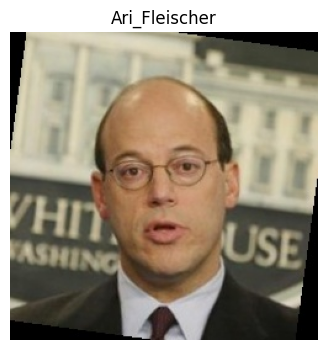

In [ ]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis("off")
plt.title(person_folder)
plt.show()

Part 5: Test try



In [ ]:
import urllib.request

model_url = "https://github.com/opencv/opencv_zoo/raw/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx"
model_path = "/root/face_detection_yunet.onnx"

urllib.request.urlretrieve(model_url, model_path)

print("Face detection model downloaded successfully.")

Face detection model downloaded successfully.


In [ ]:
import cv2
detector = cv2.FaceDetectorYN.create(model_path, "", (320, 320))

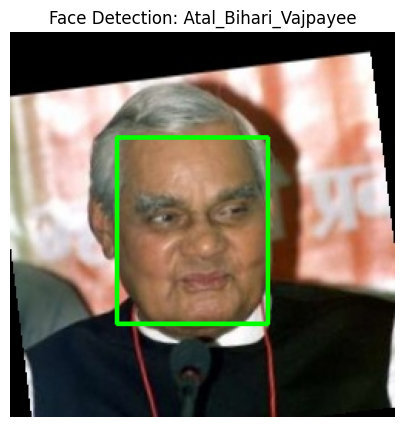

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

lfw_funneled_path = "/root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3/lfw/lfw_funneled"

person_folder = random.choice(os.listdir(lfw_funneled_path))
person_path = os.path.join(lfw_funneled_path, person_folder)

random_image = random.choice(os.listdir(person_path))
image_path = os.path.join(person_path, random_image)

image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}. Check the path and file.")
else:
    h, w = image.shape[:2]

    detector.setInputSize((w, h))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    faces = detector.detect(image_rgb)

    if faces[1] is not None:
        for face in faces[1]:
            x, y, w, h = map(int, face[:4])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Face Detection: {person_folder}")
    plt.show()


In [28]:
import kagglehub
dataset_path = kagglehub.dataset_download("yveslr/open-famous-people-faces")

100%|██████████| 53.0M/53.0M [00:00<00:00, 60.4MB/s]

Extracting files...


SAMPLE IMAGE RECOGNITION

In [5]:
import os
import random

dataset_root = "/root/.cache/kagglehub/datasets/yveslr/open-famous-people-faces/versions/4"
dataset_path = os.path.join(dataset_root, "Open Famous People Faces")

# List available person folders
person_folders = os.listdir(dataset_path)
print("Number of People:", len(person_folders))
print("Sample Person Folders:", person_folders[:5])  # Show first 5 people

# Pick a random person
random_person = random.choice(person_folders)
person_path = os.path.join(dataset_path, random_person)

# List images inside that person's folder
if os.path.isdir(person_path):
    images = os.listdir(person_path)
    print(f"\nPerson Folder: {random_person}")
    print("Images inside:", images[:5])  # Show first 5 images
else:
    print(f"Error: {random_person} is not a folder!")

Number of People: 258
Sample Person Folders: ['olivia_thirlby', 'rebel_wilson', 'judi_dench', 'george_clooney', 'monique']

Person Folder: tina_fey
Images inside: ['face_detected_5f367624.jpg', 'face_detected_71ab9810.jpg', 'face_detected_5d8f55be.jpg', 'face_detected_08aa11fb.jpg', 'face_detected_5dcced96.jpg']


0.0


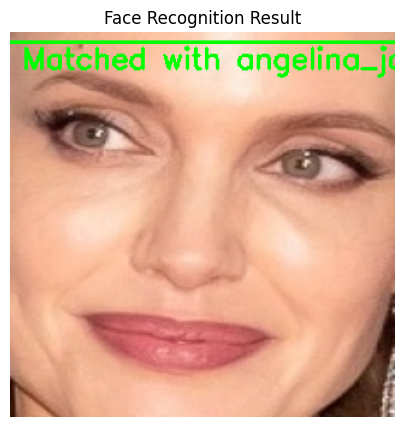

In [2]:
import urllib.request
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import kagglehub

dataset_path = kagglehub.dataset_download("yveslr/open-famous-people-faces")
dataset_path = os.path.join(dataset_path, "Open Famous People Faces")

yunet_model_path = "/root/face_detection_yunet.onnx"
recognizer_model_path = "/root/face_recognizer.onnx"

yunet_model_url = "https://github.com/opencv/opencv_zoo/raw/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx"
recognizer_model_url = "https://github.com/opencv/opencv_zoo/raw/main/models/face_recognition_sface/face_recognition_sface_2021dec.onnx"

def download_model(model_path, model_url):
    if not os.path.exists(model_path):
        urllib.request.urlretrieve(model_url, model_path)

download_model(yunet_model_path, yunet_model_url)
download_model(recognizer_model_path, recognizer_model_url)

detector = cv2.FaceDetectorYN.create(yunet_model_path, "", (320, 320))
recognizer = cv2.FaceRecognizerSF.create(recognizer_model_path, "")

custom_image_path = "/content/angelina.jpg"
custom_image = cv2.imread(custom_image_path)

if custom_image is None:
    exit()

custom_image = cv2.resize(custom_image, (320, 320))
h, w = custom_image.shape[:2]
detector.setInputSize((w, h))

faces = detector.detect(custom_image)

if faces[1] is None:
    exit()

best_face = max(faces[1], key=lambda f: f[-1])
custom_face = np.array(best_face[:4])
aligned_custom = recognizer.alignCrop(custom_image, custom_face)
custom_embedding = recognizer.feature(aligned_custom).flatten()

threshold = 0.0000001
found_match = False

for person_folder in sorted(os.listdir(dataset_path)):
    if found_match:
        break
    person_path = os.path.join(dataset_path, person_folder)

    for image_name in sorted(os.listdir(person_path)):
        dataset_image_path = os.path.join(person_path, image_name)
        dataset_image = cv2.imread(dataset_image_path)

        if dataset_image is None:
            continue

        dataset_image = cv2.resize(dataset_image, (320, 320))
        h, w = dataset_image.shape[:2]
        detector.setInputSize((w, h))

        faces = detector.detect(dataset_image)

        if faces[1] is None:
            continue

        best_dataset_face = max(faces[1], key=lambda f: f[-1])
        dataset_face = np.array(best_dataset_face[:4])
        aligned_dataset = recognizer.alignCrop(dataset_image, dataset_face)
        dataset_embedding = recognizer.feature(aligned_dataset).flatten()

        distance = cosine(custom_embedding, dataset_embedding)

        if distance < threshold:
            print(distance)
            found_match = True
            result = f"Matched with {person_folder} (Distance: {distance:.2f})"

            cv2.rectangle(custom_image, (int(custom_face[0]), int(custom_face[1])),
                          (int(custom_face[0] + custom_face[2]), int(custom_face[1] + custom_face[3])), (0, 255, 0), 2)
            cv2.putText(custom_image, result, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.title("Face Recognition Result")
            plt.show()
            break
